In [1]:
import matplotlib.pyplot as plt
import matplotlib

from tqdm import tqdm

import numpy as np
import time

In [2]:
w,h = 160,160
my_dpi = 10

In [3]:
mean = [0,0]
cov = [[2.5,0], [0,2.5]]

mean_exo = [0,0]
cov_exo = [[0.25,0], [0, 0.25]]

In [7]:
matplotlib.use('Agg')

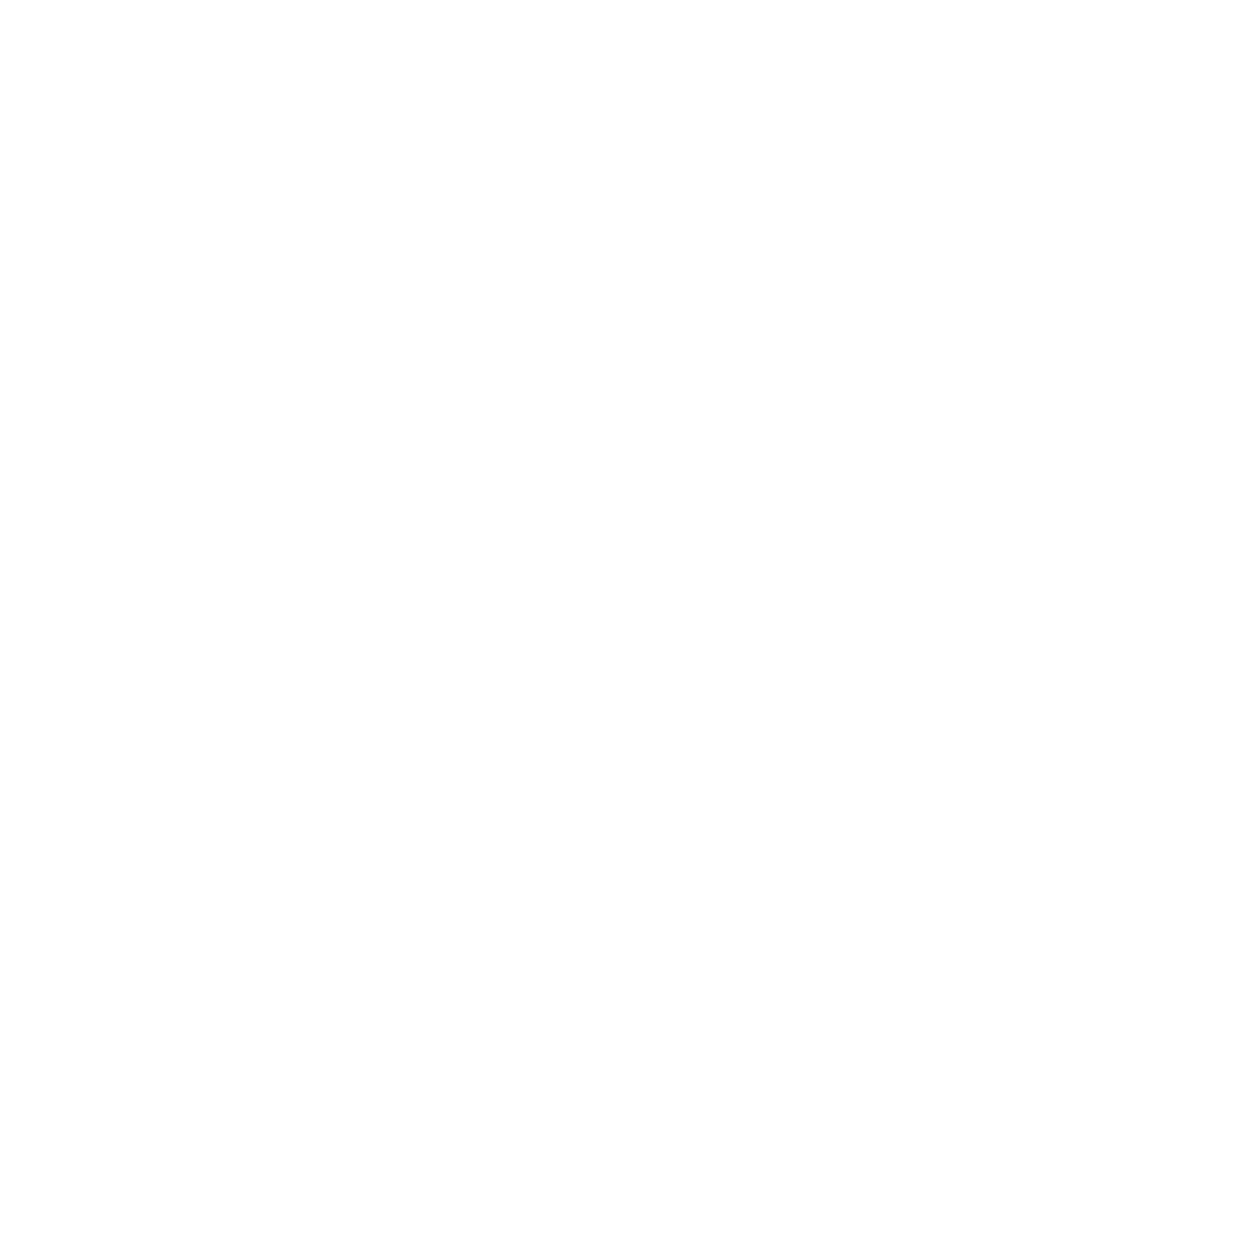

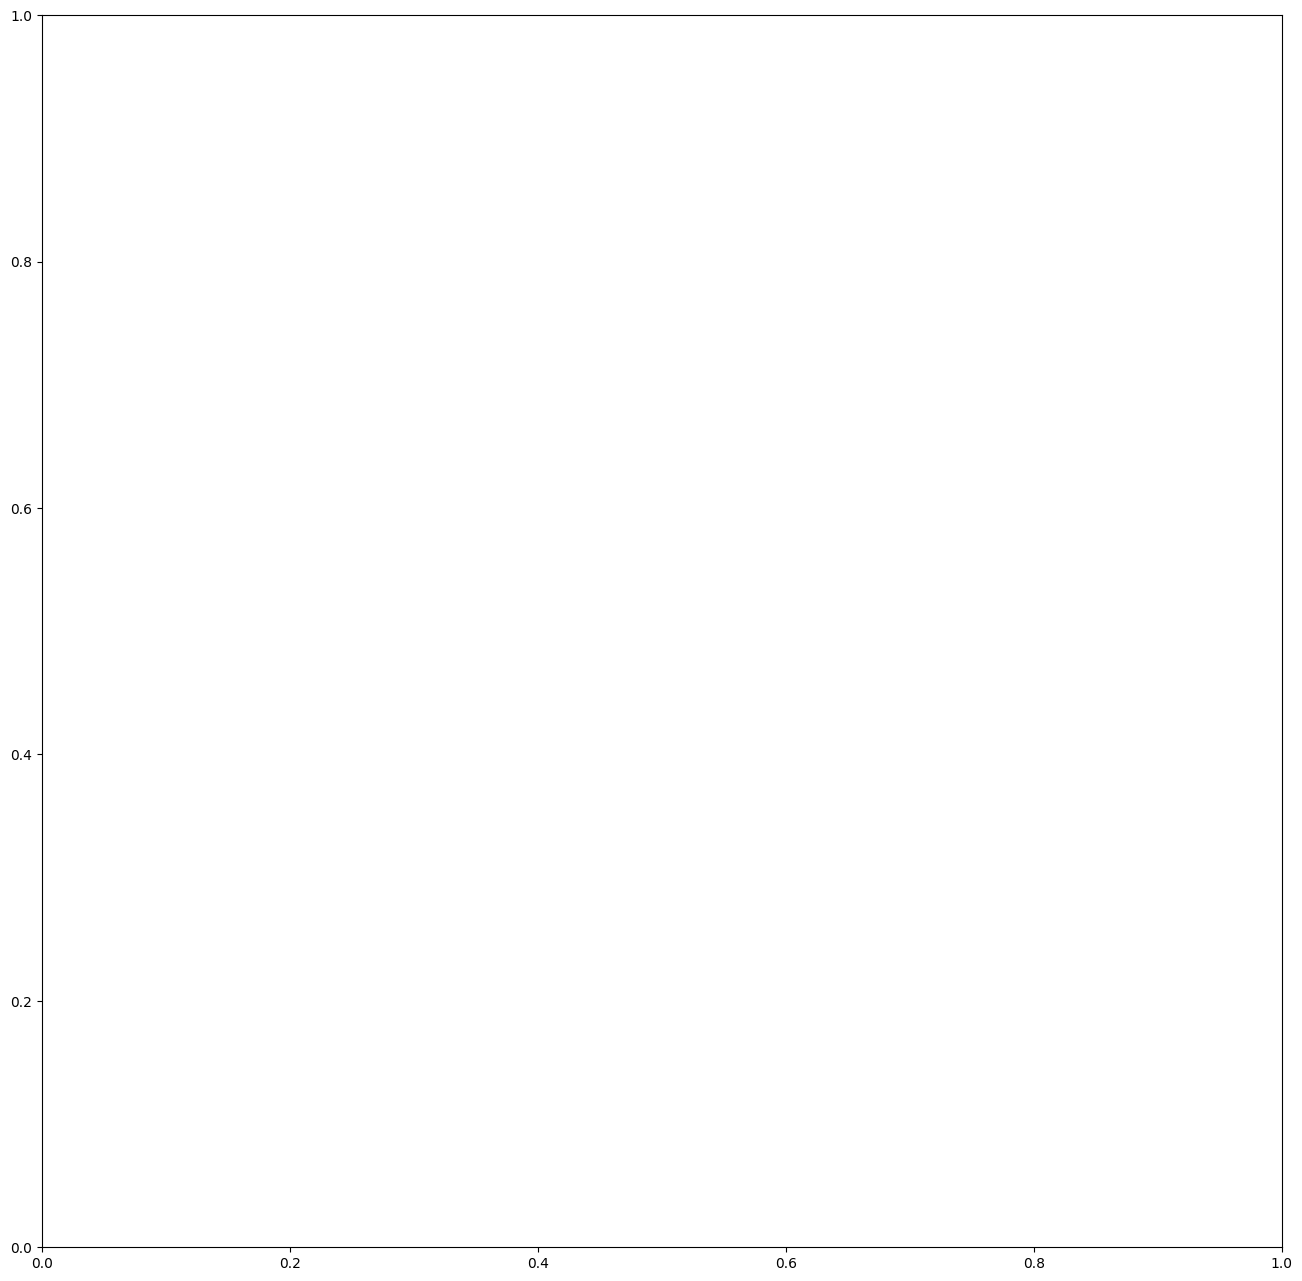

In [4]:
plt.rcParams['figure.figsize'] = [w/my_dpi, h/my_dpi]
plt.axis('off')

pts = np.random.multivariate_normal(mean, cov, 1750)
    
plt.plot(pts[:, 0], pts[:, 1], 'o', alpha=0.5, color='white', markersize=32)

plt.xlim(-14, 14)
plt.ylim(-14, 14)
    
plt.savefig('trial.png', dpi=my_dpi, facecolor='black')
plt.show()
plt.cla()

In [11]:
!file trial_exo.png
!file trial.png

trial_exo.png: PNG image data, 160 x 160, 8-bit/color RGBA, non-interlaced
trial.png: PNG image data, 160 x 160, 8-bit/color RGBA, non-interlaced


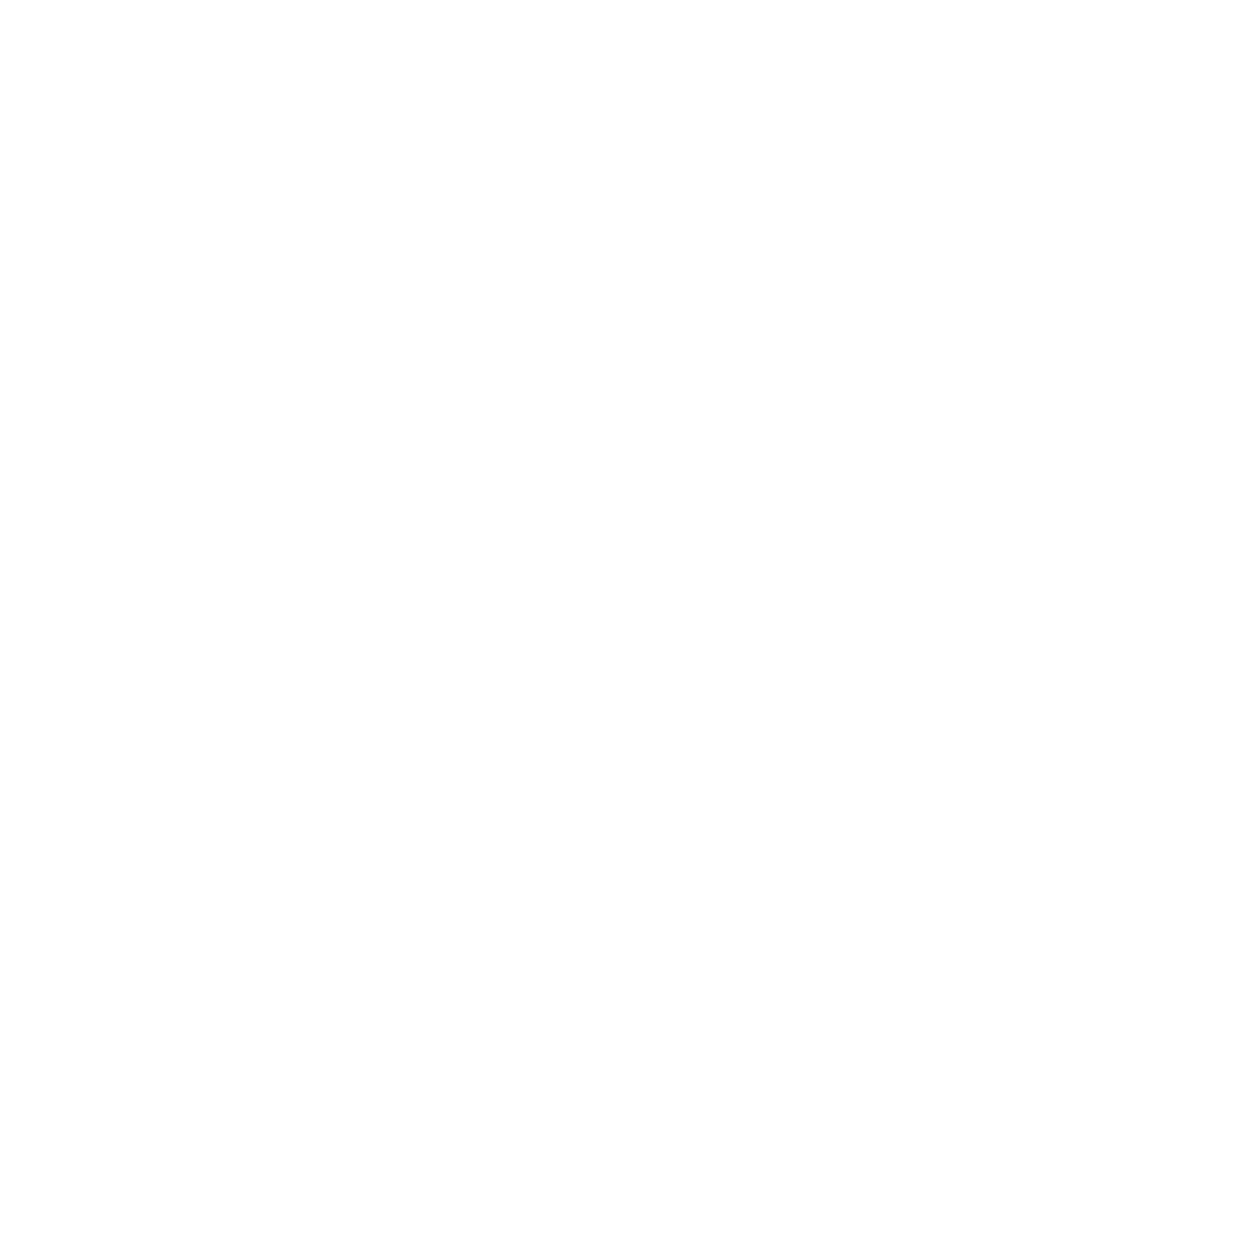

In [22]:
plt.cla()

plt.rcParams['figure.figsize'] = [w/my_dpi, h/my_dpi]
plt.axis('off')
all_pts = []

pts = np.random.multivariate_normal(mean, cov, 1750)

pts_exo = np.random.multivariate_normal(mean_exo, cov_exo, 250) 
    
x_add = np.random.randint(3,8) * np.random.choice((-1, 1))
y_add = np.random.randint(3,8) * np.random.choice((-1, 1))
    
pts_exo.T[0] = pts_exo.T[0] + x_add
pts_exo.T[1] = pts_exo.T[1] + y_add
        
all_pts = np.append(pts, pts_exo, axis = 0)
    
    
plt.plot(all_pts[:, 0], all_pts[:, 1], 'o', alpha=0.5, color='white', markersize=24)

plt.xlim(-14, 14)
plt.ylim(-14, 14)

plt.savefig('trial_exo.png', dpi=my_dpi, facecolor='black')

In [19]:
x_add, y_add, all_pts.shape

(-6, -3, (2000, 2))

In [23]:
synthetic_dataser_dir = '/data/scratch/bariskurtkaya/synthetic_dataset/'

In [24]:
# Just star
def create_synthetic_data(img_name:str, width:int = 28, height:int = 28, dpi:float = 10, mean: [] = [0,0], cov: [] = [[3,0], [0,3]], xlimit: int = 128, ylimit: int = 128):
    pts = np.random.multivariate_normal(mean, cov, 500)
    
    #plt.rcParams["figure.facecolor"] = 'black'
    plt.rcParams['figure.figsize'] = [width/dpi, height/dpi]
    plt.axis('off')
    
    plt.plot(pts[:, 0], pts[:, 1], '.', alpha=0.5, color='white')

    plt.xlim(-xlimit, xlimit)
    plt.ylim(-ylimit, ylimit)
    
    #plt.savefig(img_name, dpi=dpi, facecolor='black')
    plt.show()

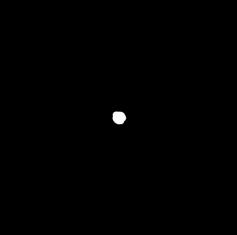

In [15]:
#for idx in tqdm(range(10000)):
    #img_name = synthetic_dataser_dir + 'trial' + str(idx)
    #create_synthetic_data(img_name = img_name, width=w, height=h, dpi=my_dpi, mean=mean, cov=cov)

create_synthetic_data(img_name = 'star', width=w, height=h, dpi=my_dpi, mean=mean, cov=cov)

In [18]:
# Star + Exoplanet
def create_exop_synth_data(img_name:str, width:int = 28, height:int = 28, dpi:float = 10, mean: [] = [0,0], cov: [] = [[3,0], [0,3]], mean_exo: [] = [0,0], cov_exo: [] = [[0.25,0], [0,0.25]], xlimit: int = 128, ylimit: int = 128):
    pts = np.random.multivariate_normal(mean, cov, 500)
    pts_exo = np.random.multivariate_normal(mean_exo, cov_exo, 250) 
    
    x_add = np.random.randint(10,30) * np.random.choice((-1, 1))
    y_add = np.random.randint(10,30) * np.random.choice((-1, 1))
    
    pts_exo.T[0] = pts_exo.T[0] + x_add
    pts_exo.T[1] = pts_exo.T[1] + y_add
    
    print(x_add, y_add)
    
    all_pts = np.append(pts, pts_exo, axis = 0)
    
    #plt.rcParams["figure.facecolor"] = 'black'
    plt.rcParams['figure.figsize'] = [width/dpi, height/dpi]
    plt.axis('off')
    
    plt.plot(all_pts[:, 0], all_pts[:, 1], '.', alpha=0.5, color='white')

    plt.xlim(-xlimit, xlimit)
    plt.ylim(-ylimit, ylimit)
    
    #plt.savefig(img_name, dpi=dpi, facecolor='black')
    plt.show()

27 15


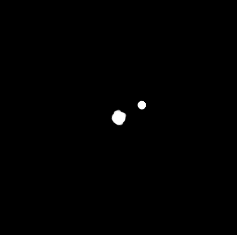

In [19]:
#for idx in tqdm(range(3000)):
    #img_name = synthetic_dataser_dir + 'trial_exo' + str(idx)
    #create_exop_synth_data(img_name = img_name, width=w, height=h, dpi=my_dpi, mean=mean, cov=cov)
    
create_exop_synth_data(img_name = 'star_exo', width=w, height=h, dpi=my_dpi, mean=mean, cov=cov)

In [ ]:
!file /data/scratch/bariskurtkaya/synthetic_dataset/trial1.png

In [23]:
noise = np.random.normal(0,10,(160,214))

noise, noise.shape

(array([[-15.09285729,  14.79484713, -12.13369749, ...,   9.79023813,
          -4.87065537,  -2.23838457],
        [ 15.69799939,  10.48778677,  15.18288194, ...,  -0.79164188,
           5.53733739,   1.64365116],
        [  8.62295563,  -5.54330462,  -2.08778244, ...,  11.86809607,
          25.31566851,  11.31675438],
        ...,
        [  0.78210727,   7.15161759,   5.8149295 , ...,  14.54110116,
           5.95471371, -11.61013329],
        [ 10.85310349,  -0.7872189 , -14.12429092, ..., -13.33736622,
           2.72796992,  -9.14591369],
        [  9.21363526,  11.82623537,  -8.15299988, ...,  -2.90882592,
         -12.05588586,  -7.33458452]]),
 (160, 214))